# 문서유사도

- 문서간 유사도 측정


In [1]:
import numpy as np

In [2]:
def cos_similarity(v1, v2):
    dot_product = np.dot(v1, v2)
    l2_norm = (np.sqrt(sum(np.square(v1))) * np.sqrt(sum(np.square(v2))))
    similarity = dot_product / l2_norm
    
    return similarity

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
doc_list = [
    'if you take the blue pill, the story ends',
    'if you take the red pill, you stay in Wonderland',
    'if you take the red pill, I show you how deep the rabbit hole goes'
]

In [6]:
tfidf_vect_simple = TfidfVectorizer()
feature_vect_simple = tfidf_vect_simple.fit_transform(doc_list)
print(feature_vect_simple.shape)

(3, 18)


In [7]:
feature_vect_dense = feature_vect_simple.todense()
vect1 = np.array(feature_vect_dense[0]).reshape(-1,)
vect2 = np.array(feature_vect_dense[1]).reshape(-1,)

similarity_simple = cos_similarity(vect1, vect2)
print('문장1, 문장2 Cosine 유사도: {0:.3f}'.format(similarity_simple))

문장1, 문장2 Cosine 유사도: 0.402


In [8]:
feature_vect_dense = feature_vect_simple.todense()
vect1 = np.array(feature_vect_dense[0]).reshape(-1,)
vect2 = np.array(feature_vect_dense[2]).reshape(-1,)

similarity_simple = cos_similarity(vect1, vect2)
print('문장1, 문장3 Cosine 유사도: {0:.3f}'.format(similarity_simple))

문장1, 문장3 Cosine 유사도: 0.404


In [9]:
feature_vect_dense = feature_vect_simple.todense()
vect1 = np.array(feature_vect_dense[1]).reshape(-1,)
vect2 = np.array(feature_vect_dense[2]).reshape(-1,)

similarity_simple = cos_similarity(vect1, vect2)
print('문장2, 문장3 Cosine 유사도: {0:.3f}'.format(similarity_simple))

문장2, 문장3 Cosine 유사도: 0.456


In [10]:
from sklearn.metrics.pairwise import cosine_similarity

In [11]:
similarity_simple_pair = cosine_similarity(feature_vect_simple[0], feature_vect_simple)
print(similarity_simple_pair)

[[1.         0.40207758 0.40425045]]


In [12]:
similarity_simple_pair = cosine_similarity(feature_vect_simple[0], feature_vect_simple[1:])
print(similarity_simple_pair)

[[0.40207758 0.40425045]]


In [13]:
similarity_simple_pair = cosine_similarity(feature_vect_simple, feature_vect_simple)
print(similarity_simple_pair)
print('shape:', similarity_simple_pair.shape)

[[1.         0.40207758 0.40425045]
 [0.40207758 1.         0.45647296]
 [0.40425045 0.45647296 1.        ]]
shape: (3, 3)


### Opinion Review 데이터셋 실습

In [14]:
from nltk.stem import WordNetLemmatizer
import nltk
import string

In [15]:
remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
lemmar = WordNetLemmatizer()

In [16]:
def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]

def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

In [17]:
import pandas as pd
import glob, os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [19]:
path = r'/Users/hakchangs/workspace/study-python/datasets/opinion-review/topics/'
all_files = glob.glob(os.path.join(path, '*.data'))
filename_list = []
opinion_text = []

for file_ in all_files:
    df = pd.read_table(file_, index_col=None, header=0, encoding='latin1')
    filename_ = file_.split('/')[-1]
    filename = filename_.split('.')[0]
    filename_list.append(filename)
    opinion_text.append(df.to_string())

document_df = pd.DataFrame({'filename': filename_list, 'opinion_text': opinion_text})

tfidf_vect = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english', \
                             ngram_range=(1, 2), min_df=0.05, max_df=0.85)
feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])

km_cluster = KMeans(n_clusters=3, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_
document_df['cluster_label'] = cluster_label

In [20]:
document_df.head(51)

,filename,opinion_text,cluster_label
0,battery-life_ipod_nano_8gb,...,0
1,gas_mileage_toyota_camry_2007,...,1
2,room_holiday_inn_london,...,2
3,location_holiday_inn_london,...,2
4,staff_bestwestern_hotel_sfo,...,2
5,voice_garmin_nuvi_255W_gps,...,0
6,speed_garmin_nuvi_255W_gps,...,0
7,size_asus_netbook_1005ha,...,0
8,screen_garmin_nuvi_255W_gps,...,0
9,battery-life_amazon_kindle,...,0


In [22]:
hotel_indexes = document_df[document_df['cluster_label'] == 2].index
hotel_indexes

Int64Index([2, 3, 4, 13, 16, 17, 20, 27, 28, 30, 31, 32, 39, 46, 49, 50], dtype='int64')

In [23]:
feature_vect.shape

(51, 4611)

In [24]:
from sklearn.metrics.pairwise import cosine_similarity

In [25]:
hotel_indexes = document_df[document_df['cluster_label'] == 2].index
print('호텔로 클러스터링된 문서들의 DataFrame Index:', hotel_indexes)

comparison_docname = document_df.iloc[hotel_indexes[0]]['filename']
print('##### 비교기준 문서명  ', comparison_docname, ' 와 타문서 유사도 #####')

similarity_pair = cosine_similarity(feature_vect[hotel_indexes[0]], feature_vect[hotel_indexes])
print(similarity_pair)

호텔로 클러스터링된 문서들의 DataFrame Index: Int64Index([2, 3, 4, 13, 16, 17, 20, 27, 28, 30, 31, 32, 39, 46, 49, 50], dtype='int64')
##### 비교기준 문서명   room_holiday_inn_london  와 타문서 유사도 #####
[[1.         0.19917258 0.22235374 0.37631406 0.26026786 0.15836737
  0.19544761 0.40020673 0.31124876 0.77312013 0.51442299 0.15026112
  0.16717527 0.81484367 0.11154184 0.10831277]]


In [26]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

가장 유사도가 큰 파일명 및 유사도:
 filename      rooms_bestwestern_hotel_sfo
similarity                       0.814844
Name: 46, dtype: object


Text(0.5, 1.0, 'room_holiday_inn_london')

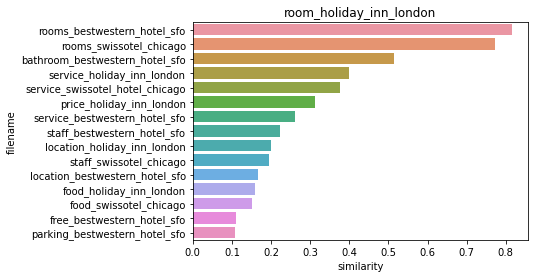

In [27]:
sorted_index = similarity_pair.argsort()[:, ::-1]
sorted_index = sorted_index[:, 1:]

hotel_sorted_indexes = hotel_indexes[sorted_index.reshape(-1)]
hotel_1_sim_value = np.sort(similarity_pair.reshape(-1))[::-1]
hotel_1_sim_value = hotel_1_sim_value[1:]

hotel_1_sim_df = pd.DataFrame()
hotel_1_sim_df['filename'] = document_df.iloc[hotel_sorted_indexes]['filename']
hotel_1_sim_df['similarity'] = hotel_1_sim_value
print('가장 유사도가 큰 파일명 및 유사도:\n', hotel_1_sim_df.iloc[0, :])

sns.barplot(x='similarity', y='filename', data=hotel_1_sim_df)
plt.title(comparison_docname)